In [3]:
%matplotlib notebook
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# オブジェクト
class MyObject():
    def __init__(self, x, y, width, height):
        self.x1 = x
        self.y1 = y
        self.x2 = x + width
        self.y2 = y + height
# エリア
class Area(MyObject):
    def __init__(self, x, y, width, height):# エリア設定
        super(Area, self).__init__(x, y, width, height)
        
    def draw(self):# 描画
        width = 0.9
        x = [self.x1 - width, 
             self.x1 - width, 
             self.x2 + width, 
             self.x2 + width, 
             self.x1 - width]
        
        y = [self.y1 - width, 
             self.y2 + width, 
             self.y2 + width, 
             self.y1 - width, 
             self.y1 - width]

        im = plt.plot(x, y, color='#1f77b4')
        margin_width = 5
        plt.ylim(self.x1 - margin_width, 
                 self.x2 + margin_width)
        plt.xlim(self.y1 - margin_width, 
                 self.y2 + margin_width)
        return im
# 障害物
class Obstacle(MyObject):
    def __init__(self, x, y, width, height):# エリア設定
        super(Obstacle, self).__init__(x, y, width, height)
    
    def draw(self):# 描画
        width = 0.9
        x = [self.x1 - width, 
             self.x1 - width, 
             self.x2 + width, 
             self.x2 + width, 
             self.x1 - width]
        
        y = [self.y1 - width, 
             self.y2 + width, 
             self.y2 + width, 
             self.y1 - width, 
             self.y1 - width]

        im = plt.plot(x, y, color='#FF0000')
        return im
# エージェント
class Agent(MyObject):
    def __init__(self, x, y):# 初期設定
        super(Agent, self).__init__(x, y, 0, 0)
    
    def getAgent(self):# 座標を取得
        return (self.x1, self.y1)
    
    def area_collision(self, area):# エリアの衝突判定
        # エリアの範囲に出たら，エリア内に戻す
        if self.x1 <= area.x1:
            self.x1 = area.x1
        if self.y1 <= area.y1:
            self.y1 = area.y1
        if self.x1 >= area.x2:
            self.x1 = area.x2
        if self.y1 >= area.y2:
            self.y1 = area.y2
    
    def obstacle_collision(self, obstacle, x, y):# 障害物との衝突判定
        if self.x1 >= obstacle.x1 \
            and self.x1 <= obstacle.x2 \
            and self.y1 >= obstacle.y1 \
            and self.y1 <= obstacle.y2:# 障害物に侵入した時
            self.x1 = x
            self.y1 = y
    
    def goal_collision(self, obstacle):# 障害物との衝突判定
        if self.x1 >= obstacle.x1 \
            and self.x1 <= obstacle.x2 \
            and self.y1 >= obstacle.y1 \
            and self.y1 <= obstacle.y2:# 障害物に侵入した時
            return True
        return False
        
    def draw(self):# 描画
        im = plt.plot(self.x1, 
                 self.y1,
                 marker='.', 
                 markersize = 20, 
                 color='#1f77b4')
        return im
    
    def up(self):# 上へ移動
        self.y1 += 1
    def down(self):# 下へ移動
        self.y1 -= 1
    def right(self):# 右へ移動
        self.x1 += 1
    def left(self):# 左へ移動
        self.x1 -= 1

class Goal(MyObject):
    def __init__(self, x, y, width, height):# エリア設定
        super(Goal, self).__init__(x, y, width, height)
    
    def draw(self):# 描画
        width = 0.9
        x = [self.x1 - width, 
             self.x1 - width, 
             self.x2 + width, 
             self.x2 + width, 
             self.x1 - width]
        
        y = [self.y1 - width, 
             self.y2 + width, 
             self.y2 + width, 
             self.y1 - width, 
             self.y1 - width]

        im = plt.plot(x, y, color='#008000')
        return im
# mainの関数
def run(goal_xy, move, fig_draw_mode):
    fig_interval = 1 #画像表示間隔
    max_t = 60
    # fig_draw_mode =1
    
    area = Area(0, 0, 30, 30)# Area 生成
    agent = Agent(2, 2)# agent 生成
    goal = Goal(goal_xy[0], goal_xy[1], 2, 2)
    
    # 障害物リスト　
    bstacle_list = [Obstacle(14, 8, 2, 20), # 障害物１
                    Obstacle(2, 5, 5, 3),  # 障害物2
                    Obstacle(20, 27, 5, 3), # 障害物3
                    Obstacle(24, 20, 5, 3),  # 障害物4
                    Obstacle(24, 20, 5, 3),  # 障害物5
                    ]
    
    object_list = [area, agent, goal] + bstacle_list# オブジェクトリスト
    #　描画
    if fig_draw_mode == 1:
        # print(type(fig_draw_mode))
        fig = plt.figure(figsize=(5, 5))
        ims = []; tmp = plt.plot()
        for oject in object_list:
                tmp += oject.draw()
        ims.append(tmp)
    # メインの計算
    for t in range(len(move)):
        if t > max_t:
            break
        x_before = agent.x1#移動前のx座標
        y_before = agent.y1#移動前のy座標
        # --移動--
        if move[t] == 'UP':
            agent.up()
        if move[t] == 'DOWN':
            agent.down()
        if move[t] == 'RIGHT':
            agent.right()
        if move[t] == 'LEFT':
            agent.left()
        # --衝突判定--
        agent.area_collision(area)# エリア
        for bstacle in bstacle_list:# 障害物
            agent.obstacle_collision(bstacle, x_before, y_before)
        # --ゴール判定--
        if agent.goal_collision(goal): break# ゴール(計算の終了)
        #　--描画--
        if fig_draw_mode == 1:
            if t % fig_interval == 0:
                tmp = plt.plot()
                for oject in object_list:
                    tmp += oject.draw()
                ims.append(tmp)

    if fig_draw_mode == 1:
        ani = animation.ArtistAnimation(fig, ims)
        ani.save("output.mp4", writer="pillow")
    
    # 計算の終了
    return agent.getAgent()

#if __name__ == "__main__":
#    move_list = []
#    for i in range(20):
#         move_list.append('RIGHT')
#         
#    print(run([28, 28], move_list, 1))

________________________
gen: 0 , best_of_run_f: 0.035 , best_of_run:
________________________
gen: 1 , best_of_run_f: 0.039 , best_of_run:
________________________
gen: 3 , best_of_run_f: 0.048 , best_of_run:
________________________
gen: 4 , best_of_run_f: 0.05 , best_of_run:
________________________
gen: 5 , best_of_run_f: 0.059 , best_of_run:
________________________
gen: 6 , best_of_run_f: 0.065 , best_of_run:
________________________
gen: 8 , best_of_run_f: 0.069 , best_of_run:
________________________
gen: 9 , best_of_run_f: 0.074 , best_of_run:
________________________
gen: 10 , best_of_run_f: 0.079 , best_of_run:
________________________
gen: 11 , best_of_run_f: 0.087 , best_of_run:
________________________
gen: 12 , best_of_run_f: 0.089 , best_of_run:
________________________
gen: 13 , best_of_run_f: 0.095 , best_of_run:
________________________
gen: 15 , best_of_run_f: 0.104 , best_of_run:
________________________
gen: 25 , best_of_run_f: 0.108 , best_of_run:
_______________

<IPython.core.display.Javascript object>


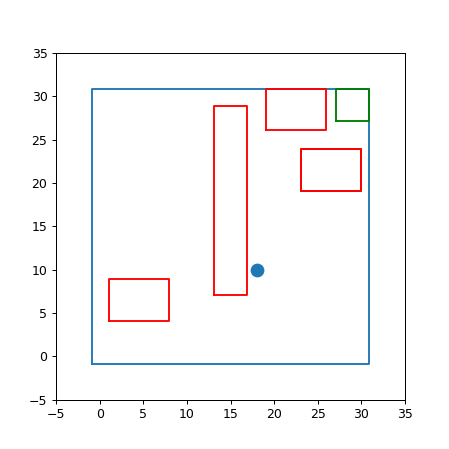

In [4]:
from random import random, randint, seed
# from statistics import mean
from copy import deepcopy
import collections
import math

POP_SIZE        = 60   # population size
MIN_DEPTH       = 2    # minimal initial random tree depth
MAX_DEPTH       = 5    # maximal initial random tree depth
GENERATIONS     = 250  # maximal number of generations to run evolution
TOURNAMENT_SIZE = 5    # size of tournament for tournament selection
XO_RATE         = 0.8  # crossover rate 
PROB_MUTATION   = 0.2  # per-node mutation probability 

def move(x, y): return [x, y]

FUNCTIONS = [move]
TERMINALS = ['UP', 'DOWN','RIGHT','LEFT']

class GPTree:
    def __init__(self, data = None, left = None, right = None):
        self.data  = data
        self.left  = left
        self.right = right
        
    def node_label(self): # string label
        if (self.data in FUNCTIONS):
            return self.data.__name__
        else: 
            return str(self.data)
    
    def print_tree(self, prefix = ""): # textual printout
        # print("%s%s" % (prefix, self.node_label()))        
        # if self.left:  self.left.print_tree (prefix + "   ")
        # if self.right: self.right.print_tree(prefix + "   ")
        pass
    def compute_tree(self):
        if (self.data in FUNCTIONS): 
            return self.data(self.left.compute_tree(), self.right.compute_tree())
        else:
            return self.data
            
    def random_tree(self, grow, max_depth, depth = 0): # create random tree using either grow or full method
        if depth < MIN_DEPTH or (depth < max_depth and not grow): 
            self.data = FUNCTIONS[randint(0, len(FUNCTIONS)-1)]
        elif depth >= max_depth:   
            self.data = TERMINALS[randint(0, len(TERMINALS)-1)]
        else: # intermediate depth, grow
            if random () > 0.5: 
                self.data = TERMINALS[randint(0, len(TERMINALS)-1)]
            else:
                self.data = FUNCTIONS[randint(0, len(FUNCTIONS)-1)]
        if self.data in FUNCTIONS:
            self.left = GPTree()          
            self.left.random_tree(grow, max_depth, depth = depth + 1)            
            self.right = GPTree()
            self.right.random_tree(grow, max_depth, depth = depth + 1)

    def mutation(self):
        if random() < PROB_MUTATION: # mutate at this node
            self.random_tree(grow = True, max_depth = 2)
        elif self.left: self.left.mutation()
        elif self.right: self.right.mutation() 

    def size(self): # tree size in nodes
        if self.data in TERMINALS: return 1
        l = self.left.size()  if self.left  else 0
        r = self.right.size() if self.right else 0
        return 1 + l + r

    def build_subtree(self): # count is list in order to pass "by reference"
        t = GPTree()
        t.data = self.data
        if self.left:  t.left  = self.left.build_subtree()
        if self.right: t.right = self.right.build_subtree()
        return t
                        
    def scan_tree(self, count, second): # note: count is list, so it's passed "by reference"
        count[0] -= 1            
        if count[0] <= 1: 
            if not second: # return subtree rooted here
                return self.build_subtree()
            else: # glue subtree here
                self.data  = second.data
                self.left  = second.left
                self.right = second.right
        else:  
            ret = None              
            if self.left  and count[0] > 1: ret = self.left.scan_tree(count, second)  
            if self.right and count[0] > 1: ret = self.right.scan_tree(count, second)  
            return ret

    def crossover(self, other): # xo 2 trees at random nodes
        if random() < XO_RATE:
            second = other.scan_tree([randint(1, other.size())], None) # 2nd random subtree
            self.scan_tree([randint(1, self.size())], second) # 2nd subtree "glued" inside 1st tree
# end class GPTree
def init_population(): # ramped half-and-half
    pop = []
    for md in range(3, MAX_DEPTH + 1):
        for i in range(int(POP_SIZE/6)):
            t = GPTree()
            t.random_tree(grow = True, max_depth = md) # grow
            pop.append(t) 
        for i in range(int(POP_SIZE/6)):
            t = GPTree()
            t.random_tree(grow = False, max_depth = md) # full
            pop.append(t) 
    return pop

def fitness(individual): # inverse mean absolute error over dataset normalized to [0,1]
    l = list(flatten(individual.compute_tree()))
    global goal_xy
    xy = run(goal_xy, l, 0)
    return 1/(math.sqrt((xy[0] - goal_xy[0])**2 + (xy[1] - goal_xy[1])**2) + 1)

def selection(population, fitnesses): # select one individual using tournament selection
    tournament = [randint(0, len(population)-1) for i in range(TOURNAMENT_SIZE)] # select tournament contenders
    tournament_fitnesses = [fitnesses[tournament[i]] for i in range(TOURNAMENT_SIZE)]
    return deepcopy(population[tournament[tournament_fitnesses.index(max(tournament_fitnesses))]]) 

def flatten(l):
    for el in l:
        if isinstance(el, collections.abc.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

def main():      
    # init stuff
    seed() # init internal state of random number generator
    # dataset = generate_dataset()
    population= init_population() 
    best_of_run = None
    best_of_run_f = 0
    best_of_run_gen = 0
    fitnesses = [fitness(population[i]) for i in range(POP_SIZE)]
    
    init_run = deepcopy(population[0])# population[0]を保存
    
    # go evolution!
    for gen in range(GENERATIONS):
        nextgen_population=[]
        for i in range(POP_SIZE):
            parent1 = selection(population, fitnesses)
            parent2 = selection(population, fitnesses)
            parent1.crossover(parent2)
            parent1.mutation()
            nextgen_population.append(parent1)
        population=nextgen_population
        fitnesses = [fitness(population[i]) for i in range(POP_SIZE)]
        if max(fitnesses) > best_of_run_f:
            best_of_run_f = max(fitnesses)
            best_of_run_gen = gen
            best_of_run = deepcopy(population[fitnesses.index(max(fitnesses))])
            print("________________________")
            print("gen:", gen, ", best_of_run_f:", round(max(fitnesses),3), ", best_of_run:") 
            best_of_run.print_tree()
        if best_of_run_f == 1: break   
    
    print("\n\n_________________________________________________\nEND OF RUN\nbest_of_run attained at gen " + str(best_of_run_gen) +\
          " and has f=" + str(round(best_of_run_f,3)))
    best_of_run.print_tree()
    #print(best_of_run.compute_tree())
    best_tree = best_of_run.compute_tree()
    best_list = list(flatten(best_tree))
    
    init_list = list(flatten(init_run.compute_tree()))
    #print(best_of_run.list)
    #print()
    #print(best_list)
    global goal_xy
    # run(goal_xy, init_list, 1)# 最適化前の結果を再現
    run(goal_xy, best_list, 1)# 最良の結果を再現    



goal_xy = [28, 28]# ゴール位置
main()